In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test=X_test/255
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


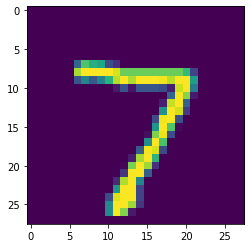

7


In [ ]:
index = 0
plt.imshow(X_test[index, :,:])
plt.show()
print(y_test[index])

In [ ]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
import numpy as np
import math
class DigitRecignizer(object):
    def __init__(self, const=0 ):
        self.name = 'constant'

    def predict(self, testX):
      array = []


      for imag in testX:
        tmp=0
        counter=0
        for row in range(28):
          for col in range(28):
            if imag[row][col]>=0.01:
              counter=counter+1
              if tmp==0:
                  tmp=tmp+1
                  top=row
                  down=row
                  left=col
                  right=col
              if row>down:
                  down=row
              if col>right:
                right=col
              if col<left:
                left=col
          #print(counter)
          #print(top)
          #print(down)
          #print(left)
          #print(right)
        center_vertical=top + (down-top)//2
        center_horizontal=left + (right-left)//2
          #print(center_vertical)
          #print(center_horizontal)
          #print(trainY[1])
        count=[0,0,0,0]
        for cut_row in range(top,down+1):
          for cut_col in range(left,right+1):
            if imag[cut_row][cut_col] >= 0.01 and cut_col<=center_horizontal and cut_row<=center_vertical:
              count[0]=count[0]+1
            if imag[cut_row][cut_col] >= 0.01 and cut_col>center_horizontal and cut_row<=center_vertical:
              count[1]=count[1]+1
            if imag[cut_row][cut_col] >= 0.01 and cut_col>center_horizontal and cut_row>center_vertical:
              count[2]=count[2]+1
            if imag[cut_row][cut_col] >= 0.01 and cut_col<=center_horizontal and cut_row>center_vertical:
              count[3]=count[3]+1
          #print(count[0])
          #print(count[1])
          #print(count[2])
          #print(count[3])
          #summa=count[0]+count[1]+count[2]+count[3]
          #print(summa)

        difference=[0]
        digit = [[0.25*counter,0.25*counter,0.25*counter,0.25*counter],
        [0.2*counter,0.5*counter,0.3*counter,0],
        [0.2*counter,0.3*counter,0.19*counter,0.31*counter],
        [0.15*counter,0.35*counter,0.35*counter,0.15*counter],
        [0.33*counter,0.33*counter,0.33*counter,0.01*counter],
        [0.36*counter,0.15*counter,0.35*counter,0.14*counter],
        [0.29*counter,0.12*counter,0.29*counter,0.30*counter],
        [0.19*counter,0.49*counter,0.02*counter,0.3*counter],
        [0.25*counter,0.25*counter,0.25*counter,0.25*counter],
        [0.29*counter,0.3*counter,0.29*counter,0.12*counter]]
        predict_result = [0,0,0,0,0,0,0,0,0,0]
        for otvet in range(10):
         for diff in range(4):
            difference[0] = math.fabs(digit[otvet][diff]-count[diff])
            predict_result[otvet]=predict_result[otvet]+difference[0]
          # print(predict_result)
          #print(predict_result.index(min(predict_result)))
        array.append(predict_result.index(min(predict_result)))


      return array


In [ ]:
model = DigitRecignizer()
pred = model.predict(X_test)

In [ ]:
accuracy = np.sum(pred == y_test)/ len(y_test)
print(accuracy)

0.2907
